In [2]:
import mpl_finance as mpf
import matplotlib
import datetime
import matplotlib.pyplot as plt
from matplotlib.pylab import date2num 
import pandas as pd
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

移动窗口---rolling
操作对象可以是Series，也可以是Dataframe类型

In [3]:
df = pd.DataFrame({'A1': [1, 2, 2], 'A2': [4, 3, 6],
                   'A3': [7, 2, 5]}, index=['一', '二', '三'])
df

,A1,A2,A3
一,1,4,7
二,2,3,2
三,2,6,5


#### window参数和统计函数func（）
center参数默认为False---窗口不是居中统计的

In [62]:
df.rolling(window=2).sum()

,A1,A2,A3
一,NaN,NaN,NaN
二,3.0,7.0,9.0
三,4.0,9.0,7.0


In [63]:
s1=pd.Series([1,2,3,4])
s1

0    1
1    2
2    3
3    4
dtype: int64

In [64]:
s1.rolling(2).sum()

0    NaN
1    3.0
2    5.0
3    7.0
dtype: float64

In [66]:
s1.rolling(3).sum()

0    NaN
1    NaN
2    6.0
3    9.0
dtype: float64

#### center参数设置为True
窗口居中统计

In [67]:
s1=pd.Series([1,2,3,4,6,7,8,9,10])
s1

0     1
1     2
2     3
3     4
4     6
5     7
6     8
7     9
8    10
dtype: int64

In [60]:
s1.rolling(5,center=True).sum()

0     NaN
1     NaN
2    16.0
3    22.0
4    28.0
5    34.0
6    40.0
7     NaN
8     NaN
dtype: float64

In [68]:
s1.rolling(3,center=True).sum()

0     NaN
1     6.0
2     9.0
3    13.0
4    17.0
5    21.0
6    24.0
7    27.0
8     NaN
dtype: float64

#### 绘图展示
绘出交易率df1['turnover_rate']的时间序列图和均线图

In [9]:
import tushare as ts
pro=ts.pro_api('5f2dc9d17ebed3601a4fbea74148a25067d067138bf88515693e9b7d')

df1 = pro.daily(ts_code='000001.SZ',trade_date='',fields='trade_date,open,high  , low,  close')
df1['trade_date']=df1['trade_date'].astype('datetime64')
df1=df1.set_index('trade_date')
df1.head()


,open,high,low,close
trade_date,,,,
2020-01-23,15.92,15.92,15.39,15.54
2020-01-22,15.92,16.16,15.71,16.09
2020-01-21,16.34,16.34,15.93,16.00
2020-01-20,16.43,16.61,16.35,16.45
2020-01-17,16.38,16.55,16.35,16.39


<Figure size 1600x640 with 0 Axes>

(array([730851., 731581., 732312., 733042., 733773., 734503., 735234.,
        735964., 736695., 737425.]), <a list of 10 Text xticklabel objects>)

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 <a list of 7 Text yticklabel objects>)

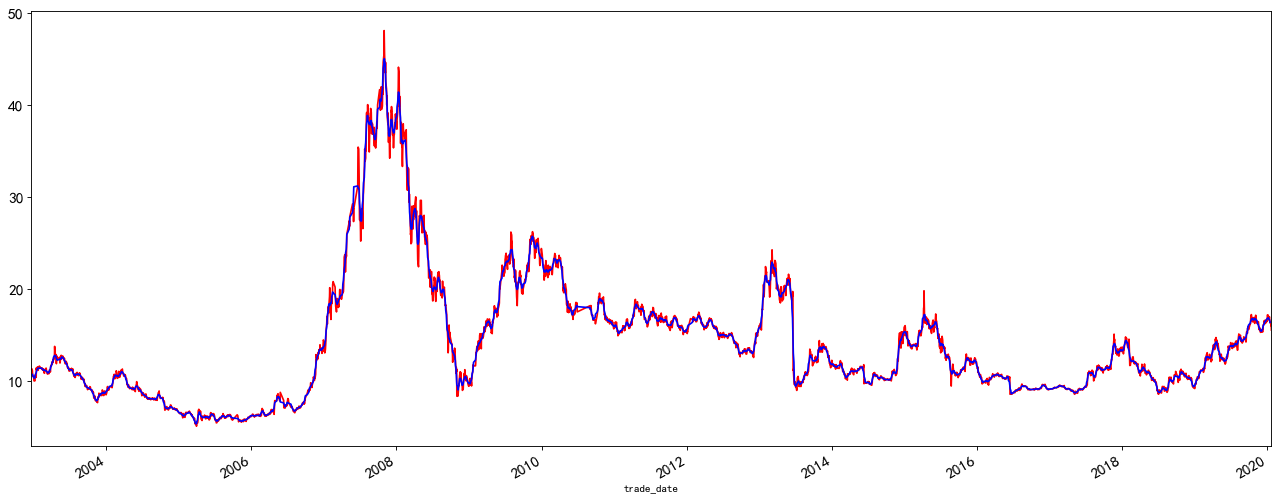

In [12]:

import matplotlib.pyplot as plt
plt.figure(figsize=[20,8],dpi=80)

plt.plot(df1['close'],'r-')
#plt.plot(df1['close'],linestyle='dashed')  linestyle设置线条的风格，包括颜色和线条样式

plt.xticks(fontsize=14)  #修改x轴刻度的大小
plt.yticks(fontsize=14)  #修改y轴刻度的大小


df1['close'].rolling(10,center=True).mean().plot(style='b-')  #移动平均数
plt.show()